In [1]:
import numpy as np
import matplotlib.pyplot as plt

from IPython.display import Markdown, display

import sys
import os
sys.path.insert(0, os.path.abspath('../'))
from gropt import diff_duty_cycle
from helper_utils import get_bval, get_moment_plots

In [2]:
import seaborn as sns
def plotter(G, dt, gmax, smax, TE, T_readout):
    params = {}
    params['TE'] = TE
    params['T_readout'] = T_readout
    params['dt'] = dt
    
    bval = get_bval(G, params)
    tt = np.arange(G.size) * dt * 1000
    
    duty = np.mean(G**2.0)/gmax**2.0 * 100
    
    display(Markdown('#### TE = %.1f ms' % (TE*1000,)))
    display(Markdown('#### bval = %.1f' % bval))
    display(Markdown('#### Duty Cycle = %.1f%%' % duty))
    
    sns.set_style('ticks')
    sns.set_context('talk')
    
    plt.figure()
    plt.plot(tt, G)
    plt.axhline(gmax, color = 'r', linestyle=':')
    plt.axhline(-gmax, color = 'r', linestyle=':')
    plt.axhline(0, color = '0.5', linestyle=':')
    plt.title('G')
    sns.despine()
    plt.tight_layout()
    
    
    plt.figure()
    plt.plot(tt[:-1], np.diff(G)/dt)
    plt.axhline(smax, color = 'r', linestyle=':')
    plt.axhline(-smax, color = 'r', linestyle=':')
    plt.axhline(0, color = '0.5', linestyle=':')
    plt.title('Slew')
    sns.despine()
    plt.tight_layout()
    
    mm = get_moment_plots(G, T_readout, dt)
    plt.figure()
    for i in range(3):
        plt.plot(tt, mm[i]/np.abs(mm[i]).max(), label = '%d' % i)
    plt.axhline(0, color = '0.5', linestyle=':')
    plt.title('Moments')
    plt.legend()
    sns.despine()
    plt.tight_layout()

### Duty Cycle used here:

$\LARGE\frac{\sum_{i=0}^N g_i^2}{Ng_{max}^2}\large*100$

In [10]:
dt = 400e-6
T_90 = 4e-3
T_180 = 8.0e-3
T_readout = 16e-3
N_moments = 2
gmax = .08
smax = 50.0

## Traditional M0 + M1 CODE

#### TE = 70.0 ms

#### bval = 604.0

#### Duty Cycle = 59.6%

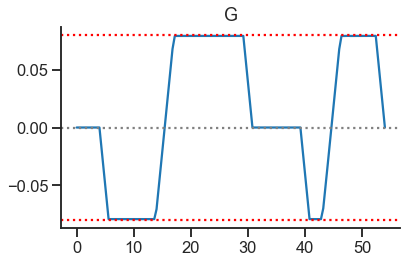

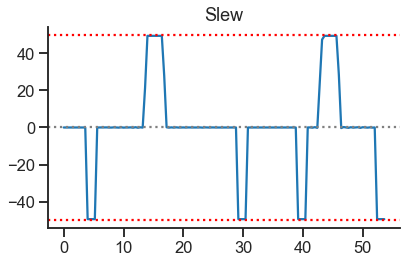

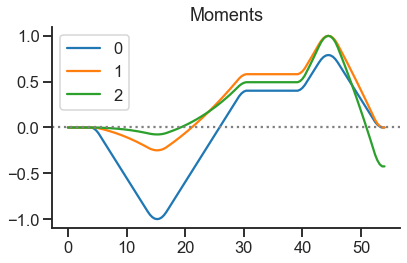

In [11]:
TE = 70e-3
bval = -1000
duty_cycle = -1.0

G, dd = diff_duty_cycle(dt, T_90, T_180, T_readout, TE, N_moments, gmax, smax, bval, duty_cycle)
if dd[0] == 0:
    print('NOT FEASIBLE')


plotter(G, dt, gmax, smax, TE, T_readout)

## M0 + M1 Nulled, bval = 600, TE = 90ms (20 extra ms)
### Derated gmax

#### Derated gmax = 66.4

#### TE = 75.0 ms

#### bval = 600.0

#### Duty Cycle = 45.2%

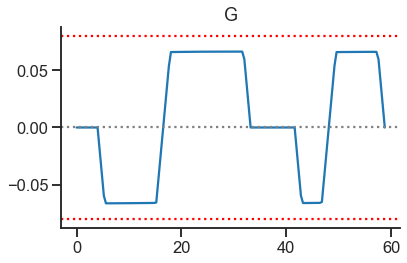

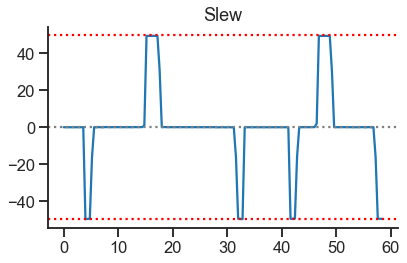

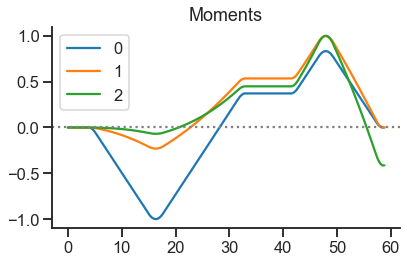

In [20]:
TE = 75e-3
bval = 600
duty_cycle = -1.0
gmax_derate = 0.83

G, dd = diff_duty_cycle(dt, T_90, T_180, T_readout, TE, N_moments, gmax_derate*gmax, smax, bval, duty_cycle)
if dd[0] == 0:
    print('NOT FEASIBLE')
    
display(Markdown('#### Derated gmax = %.1f' % (1000*gmax_derate*gmax,)))
plotter(G, dt, gmax, smax, TE, T_readout)

## M0 + M1 Nulled, bval = 600, TE = 90ms (20 extra ms)
### Duty Cycle minimized

#### TE = 75.0 ms

#### bval = 600.0

#### Duty Cycle = 37.3%

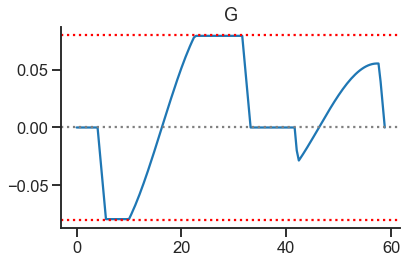

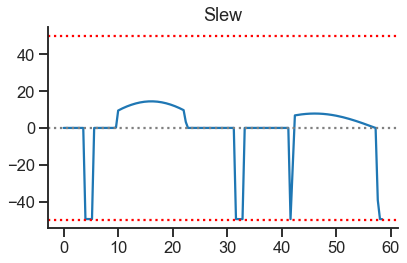

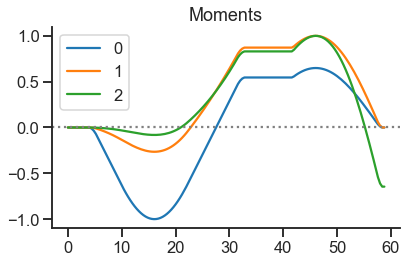

In [21]:
TE = 75e-3
bval = 600
duty_cycle = 1.0

G, dd = diff_duty_cycle(dt, T_90, T_180, T_readout, TE, N_moments, gmax, smax, bval, duty_cycle)
if dd[0] == 0:
    print('NOT FEASIBLE')

plotter(G, dt, gmax, smax, TE, T_readout)

#### TE = 90.0 ms

#### bval = 600.0

#### Duty Cycle = 17.7%

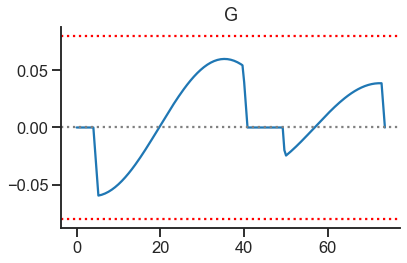

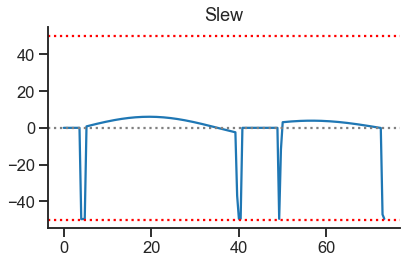

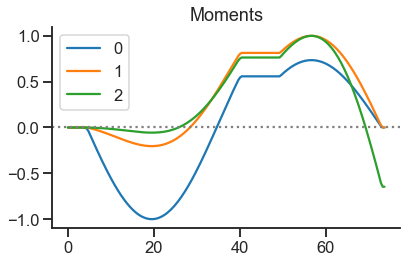

In [30]:
TE = 90e-3
bval = 600
duty_cycle = 1.0

G, dd = diff_duty_cycle(dt, T_90, T_180, T_readout, TE, N_moments, gmax, smax, bval, duty_cycle)
if dd[0] == 0:
    print('NOT FEASIBLE')

plotter(G, dt, gmax, smax, TE, T_readout)